In [4]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
root = '/content/drive/MyDrive/Interview/UPS/data'

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Classification

## Examin the reason for customer churn

Given a dataset of customer, examine the reason for churn, via classification.

__EDA__

In [7]:
customer_df = pd.read_csv(f'{root}/Churn_Modelling.csv')
customer_df.head()

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [8]:
customer_df.info()
customer_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   CredRate         10000 non-null  int64  
 2   Geography        10000 non-null  object 
 3   Gender           9996 non-null   object 
 4   Age              9994 non-null   float64
 5   Tenure           10000 non-null  int64  
 6   Balance          10000 non-null  float64
 7   Prod Number      10000 non-null  int64  
 8   HasCrCard        10000 non-null  int64  
 9   ActMem           10000 non-null  int64  
 10  EstimatedSalary  9996 non-null   float64
 11  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [34]:
display(customer_df['Prod Number'].value_counts(),
customer_df['Geography'].value_counts(),
customer_df['Gender'].value_counts())

Prod Number
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender
Male      5453
Female    4543
Name: count, dtype: int64

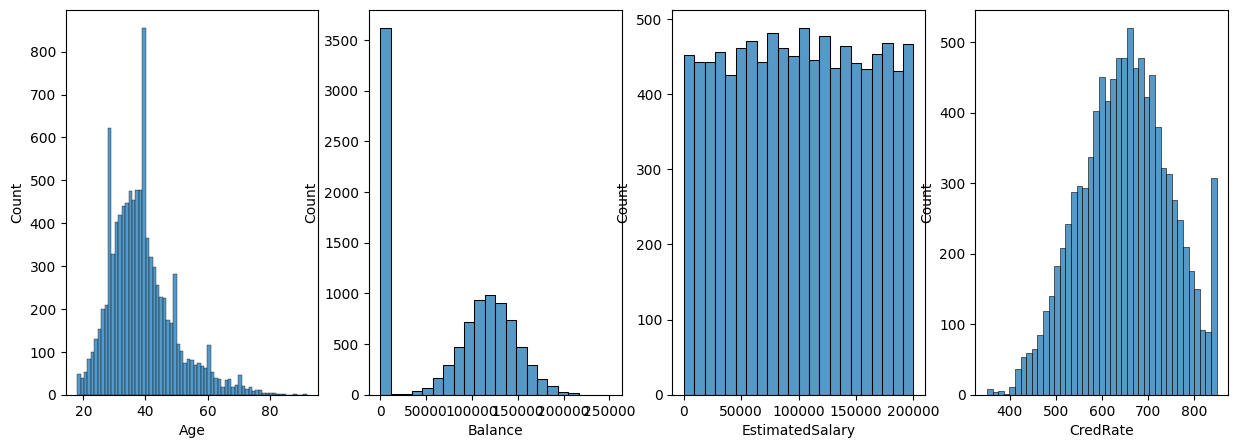

In [21]:
# plot distribution
_, axis = plt.subplots(ncols = 4, figsize = (15, 5))
sns.histplot(customer_df['Age'], ax = axis[0])
sns.histplot(customer_df['Balance'], ax = axis[1])
sns.histplot(customer_df['EstimatedSalary'], ax = axis[2])
sns.histplot(customer_df['CredRate'], ax = axis[3])
plt.show()

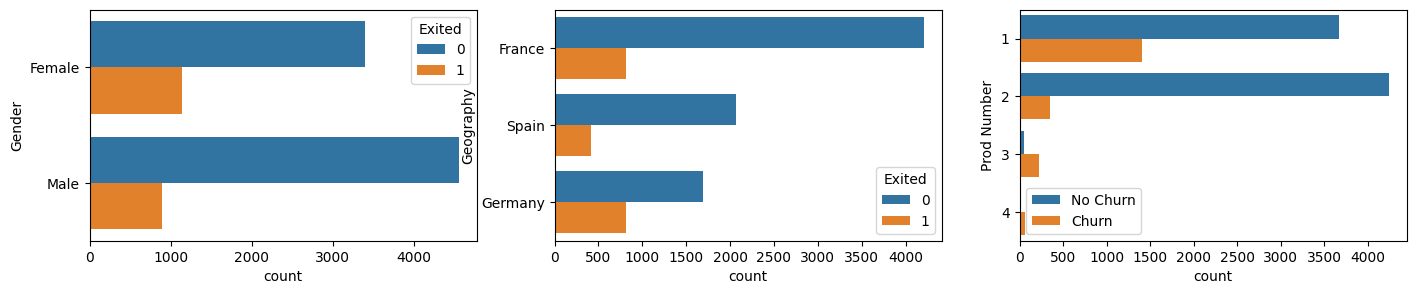

In [48]:
# check categorical variable Gender
_, axis = plt.subplots(ncols = 3, figsize = (17, 3))

sns.countplot(customer_df, y ='Gender', hue='Exited', ax=axis[0])
sns.countplot(customer_df, y ='Geography', hue='Exited', ax=axis[1])
sns.countplot(customer_df, y ='Prod Number', hue='Exited', ax=axis[2])
plt.legend(labels = ["No Churn","Churn"])
plt.show()

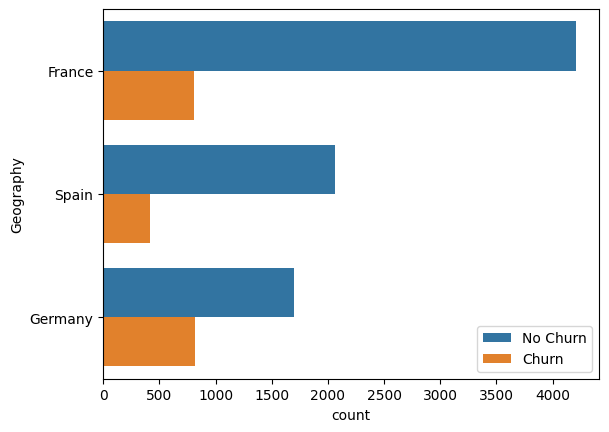

In [31]:
sns.countplot(customer_df, y ='Geography', hue='Exited')
plt.legend(labels = ["No Churn","Churn"])
plt.show()

In [53]:
correlation = customer_df[['Exited','CredRate', 'Balance','EstimatedSalary']].corr()
correlation

,Exited,CredRate,Balance,EstimatedSalary
Exited,1.000000,-0.027094,0.118533,0.012235
CredRate,-0.027094,1.000000,0.006268,-0.001352
Balance,0.118533,0.006268,1.000000,0.013133
EstimatedSalary,0.012235,-0.001352,0.013133,1.000000


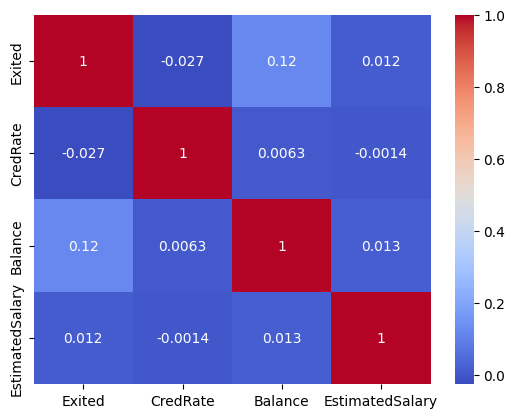

In [57]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

__Pick the most important features__

Approach: fir RanomForest and employ feature importance function.

In [62]:
customer_df.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [65]:
customer_df["Age"].fillna(customer_df.Age.mean(), inplace=True)
customer_df["Gender"].fillna(customer_df.Gender.mode().max(), inplace=True)
customer_df["EstimatedSalary"].fillna(customer_df.EstimatedSalary.mean(), inplace=True)

In [66]:
customer_df.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    0
Exited             0
dtype: int64

In [78]:
customer_df['Gender'] = customer_df['Gender'].astype('category').cat.codes
customer_df['Prod Number'] = customer_df['Prod Number'].astype('category').cat.codes
customer_df['HasCrCard'] = customer_df['HasCrCard'].astype('category').cat.codes
customer_df['ActMem'] = customer_df['ActMem'].astype('category').cat.codes
customer_df['Geography'] = customer_df['Geography'].astype('category').cat.codes

customer_df.dtypes


CustomerId           int64
CredRate             int64
Geography             int8
Gender                int8
Age                float64
Tenure               int64
Balance            float64
Prod Number           int8
HasCrCard             int8
ActMem                int8
EstimatedSalary    float64
Exited                int8
dtype: object

__Find most importatnt features__

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = customer_df.drop(columns = ['Exited', 'CustomerId'])
y = customer_df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8685


In [94]:
for feature_importance in zip(X.columns, rf_model.feature_importances_):
    print(feature_importance)

('CredRate', 0.14276034531387588)
('Geography', 0.03701049561371435)
('Gender', 0.01886614761016146)
('Age', 0.23816103166148492)
('Tenure', 0.08202830306366544)
('Balance', 0.13854530053413483)
('Prod Number', 0.13345097114449544)
('HasCrCard', 0.019489330039719706)
('ActMem', 0.041545185657990966)
('EstimatedSalary', 0.14814288936075712)


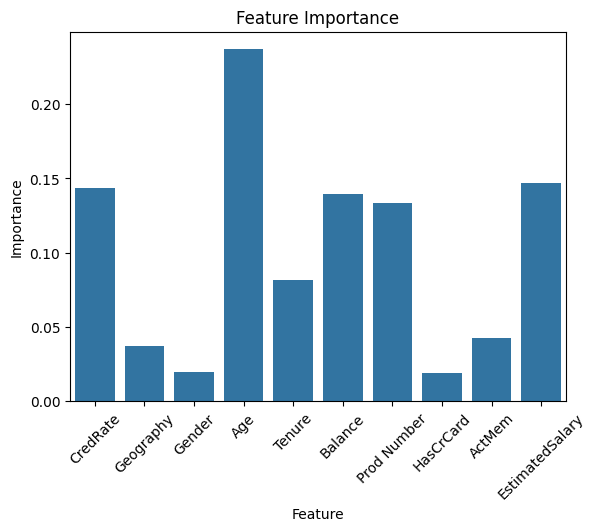

In [91]:
sns.barplot(x=X.columns, y=rf_model.feature_importances_)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

#### classification based on top 5 most important features:


In [96]:
features = ['Age', 'Balance', 'EstimatedSalary', 'CredRate', 'Prod Number']
X = customer_df[features]
y = customer_df['Exited']

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgr_model = LogisticRegression()
lgr_model.fit(X_train, y_train)

y_pred = lgr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.8


The most important feature for predicting customer churn are:
'Age', 'Balance', 'EstimatedSalary', 'CredRate', and 'Prod Number'